In [ ]:
!pip install -U transformers
!pip install -U datasets
!pip install -U accelerate
!pip install -U bertviz
!pip install -U umap-learn
!pip install -U sentencepiece
!pip install -U urllib3
!pip install -U py7zr
!pip install -U weave

In [ ]:
import wandb
from google.colab import userdata
import weave
WANDB_API_KEY = userdata.get('WANDB_API_KEY')
wandb.login(key=WANDB_API_KEY)
weave.init('arpitkadam/Distilbert')

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: arpitkadam922 (arpitkadam) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
weave: wandb version 0.23.1 is available!  To upgrade, please run:
weave:  $ pip install wandb --upgrade
weave: Logged in as Weights & Biases user: arpitkadam922.
weave: View Weave data at https://wandb.ai/arpitkadam/Distilbert/weave


In [ ]:
from datasets import load_dataset

ds = load_dataset("abisee/cnn_dailymail", "3.0.0")

README.md: 0.00B [00:00, ?B/s]

3.0.0/train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

3.0.0/train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

3.0.0/train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

3.0.0/validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

3.0.0/test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [ ]:
from IPython.display import Markdown

In [ ]:
Markdown(ds['train'][0]['article'])

LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don't plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don't think I'll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office chart. Details of how he'll mark his landmark birthday are under wraps. His agent and publicist had no comment on his plans. "I'll definitely have some sort of party," he said in an interview. "Hopefully none of you will be reading about it." Radcliffe's earnings from the first five Potter films have been held in a trust fund which he has not been able to touch. Despite his growing fame and riches, the actor says he is keeping his feet firmly on the ground. "People are always looking to say 'kid star goes off the rails,'" he told reporters last month. "But I try very hard not to go that way because it would be too easy for them." His latest outing as the boy wizard in "Harry Potter and the Order of the Phoenix" is breaking records on both sides of the Atlantic and he will reprise the role in the last two films.  Watch I-Reporter give her review of Potter's latest » . There is life beyond Potter, however. The Londoner has filmed a TV movie called "My Boy Jack," about author Rudyard Kipling and his son, due for release later this year. He will also appear in "December Boys," an Australian film about four boys who escape an orphanage. Earlier this year, he made his stage debut playing a tortured teenager in Peter Shaffer's "Equus." Meanwhile, he is braced for even closer media scrutiny now that he's legally an adult: "I just think I'm going to be more sort of fair game," he told Reuters. E-mail to a friend . Copyright 2007 Reuters. All rights reserved.This material may not be published, broadcast, rewritten, or redistributed.

In [ ]:
Markdown(ds['train'][0]['highlights'])

Harry Potter star Daniel Radcliffe gets £20M fortune as he turns 18 Monday .
Young actor says he has no plans to fritter his cash away .
Radcliffe's earnings from first five Potter films have been held in trust fund .

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [ ]:
# from transformers import pipeline

# pipe = pipeline("text-generation", model="openai-community/gpt2-large")

Device set to use cuda:0


In [ ]:
input_text = ds['train'][1]['article']
query = input_text + "\nTL;DR:\n"

In [ ]:
len(query)

4059

In [ ]:
pipe_out = pipe(query, max_length=4096, clean_up_tokenization_spaces=True)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=4096) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


In [ ]:
Markdown(pipe_out[0]['generated_text'][len(query):])

The ninth floor of the Miami-Dade pretrial detention facility is called the "forgotten floor," because many of the mentally ill inmates there are housed there before they face a judge. More than one-third of the people detained there are mentally ill, so it's a huge problem. The solution is to move the mentally ill into more humane facilities. The judge is working on it.

In [ ]:
summaries = {}

summaries['openai-community/gpt2-large'] = pipe_out[0]['generated_text'][len(query):]

In [ ]:
summaries

{'openai-community/gpt2-large': 'The ninth floor of the Miami-Dade pretrial detention facility is called the "forgotten floor," because many of the mentally ill inmates there are housed there before they face a judge. More than one-third of the people detained there are mentally ill, so it\'s a huge problem. The solution is to move the mentally ill into more humane facilities. The judge is working on it.'}

In [ ]:
# # Use a pipeline as a high-level helper
# from transformers import pipeline

# pipe = pipeline("summarization", model="google-t5/t5-large")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [ ]:
pipe_out = pipe(query, max_length=4096, clean_up_tokenization_spaces=True)

Your max_length is set to 4096, but your input_length is only 994. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=497)
Both `max_new_tokens` (=256) and `max_length`(=4096) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


In [ ]:
Markdown(pipe_out[0]['summary_text'])

judge says one-third of all people in Miami-dade county jails are mentally ill. mental hospitals were so horrible they were shut down, judge says. 40,000 to 50,000 people are in mental hospitals.

In [ ]:
summaries['google-t5/t5-large'] = pipe_out[0]['summary_text']

In [ ]:
summaries

{'openai-community/gpt2-large': 'The ninth floor of the Miami-Dade pretrial detention facility is called the "forgotten floor," because many of the mentally ill inmates there are housed there before they face a judge. More than one-third of the people detained there are mentally ill, so it\'s a huge problem. The solution is to move the mentally ill into more humane facilities. The judge is working on it.',
 'google-t5/t5-large': 'judge says one-third of all people in Miami-dade county jails are mentally ill. mental hospitals were so horrible they were shut down, judge says. 40,000 to 50,000 people are in mental hospitals.'}

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("summarization", model="facebook/bart-large-cnn")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [ ]:
pipe_out = pipe(query, max_length=4096, clean_up_tokenization_spaces=True)

Your max_length is set to 4096, but your input_length is only 894. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=447)


In [ ]:
Markdown(pipe_out[0]['summary_text'])

Judge Steven Leifman is an advocate for justice and the mentally ill. About one-third of all people in Miami-Dade county jails are mentally ill, he says. He says the sheer volume is overwhelming the system. Starting in 2008, many inmates will be sent to a new mental health facility.

In [ ]:
summaries["facebook/bart-large-cnn"] = pipe_out[0]['summary_text']

In [ ]:
summaries

{'openai-community/gpt2-large': 'The ninth floor of the Miami-Dade pretrial detention facility is called the "forgotten floor," because many of the mentally ill inmates there are housed there before they face a judge. More than one-third of the people detained there are mentally ill, so it\'s a huge problem. The solution is to move the mentally ill into more humane facilities. The judge is working on it.',
 'google-t5/t5-large': 'judge says one-third of all people in Miami-dade county jails are mentally ill. mental hospitals were so horrible they were shut down, judge says. 40,000 to 50,000 people are in mental hospitals.',
 'facebook/bart-large-cnn': 'Judge Steven Leifman is an advocate for justice and the mentally ill. About one-third of all people in Miami-Dade county jails are mentally ill, he says. He says the sheer volume is overwhelming the system. Starting in 2008, many inmates will be sent to a new mental health facility.'}

In [ ]:
for key, value in summaries.items():
  print(key.upper())
  print(value)
  print()

OPENAI-COMMUNITY/GPT2-LARGE
The ninth floor of the Miami-Dade pretrial detention facility is called the "forgotten floor," because many of the mentally ill inmates there are housed there before they face a judge. More than one-third of the people detained there are mentally ill, so it's a huge problem. The solution is to move the mentally ill into more humane facilities. The judge is working on it.

GOOGLE-T5/T5-LARGE
judge says one-third of all people in Miami-dade county jails are mentally ill. mental hospitals were so horrible they were shut down, judge says. 40,000 to 50,000 people are in mental hospitals.

FACEBOOK/BART-LARGE-CNN
Judge Steven Leifman is an advocate for justice and the mentally ill. About one-third of all people in Miami-Dade county jails are mentally ill, he says. He says the sheer volume is overwhelming the system. Starting in 2008, many inmates will be sent to a new mental health facility.



In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large-cnn").to(device)

In [ ]:
tokenizer

BartTokenizerFast(name_or_path='facebook/bart-large-cnn', vocab_size=50265, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	50264: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=True, special=True),
}
)

In [ ]:
model

BartForConditionalGeneration(
  (model): BartModel(
    (shared): BartScaledWordEmbedding(50264, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): BartScaledWordEmbedding(50264, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartEncoderLayer(
          (self_attn): BartAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
        

In [ ]:
data = load_dataset("knkarthick/samsum")

In [ ]:
data

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14731
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
})

In [ ]:
data['train'][0]

{'id': '13818513',
 'dialogue': "Amanda: I baked  cookies. Do you want some?\nJerry: Sure!\nAmanda: I'll bring you tomorrow :-)",
 'summary': 'Amanda baked cookies and will bring Jerry some tomorrow.'}

In [ ]:
dialogue_len = [len(x['dialogue'].split()) for x in data['train']]
summary_len = [len(x['summary'].split()) for x in data['train']]

In [ ]:
import pandas as pd

length_df = pd.DataFrame([dialogue_len, summary_len]).T
length_df.columns = ['Dialogue length', 'Summary length']

In [ ]:
length_df

,Dialogue length,Summary length
0,16,9
1,18,10
2,98,14
3,26,18
4,179,27
...,...,...
14726,56,16
14727,198,36
14728,142,22
14729,276,40


In [ ]:
max(length_df['Dialogue length'])

803

array([[<Axes: title={'center': 'Dialogue length'}>,
        <Axes: title={'center': 'Summary length'}>]], dtype=object)

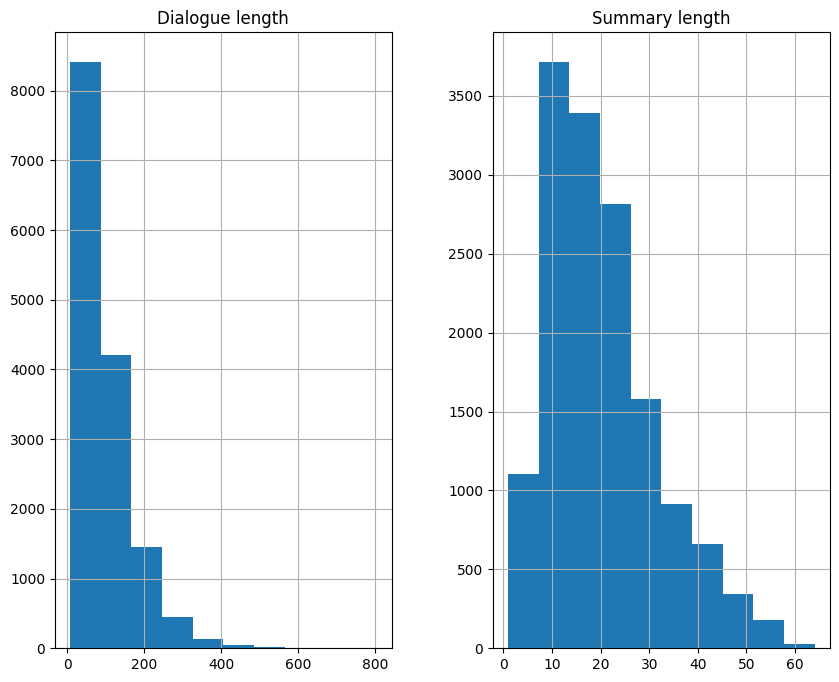

In [ ]:
length_df.hist(figsize=(10,8))

In [ ]:
def get_feature(batch):
  enc = tokenizer(batch['dialogue'],
                    text_target=batch['summary'],
                    truncation=True,
                    max_length=1024,
                    padding=False)

  return {
        "input_ids": [list(x) for x in enc["input_ids"]],
        "attention_mask": [list(x) for x in enc["attention_mask"]],
        "labels": [list(x) for x in enc["labels"]]
    }

In [ ]:
data_pt = data.map(
    get_feature,
    batched=True,
    batch_size=200,            # tune this for memory/speed during mapping
    remove_columns=data['train'].column_names,  # drop old raw columns to save memory
    load_from_cache_file=False
)

Map:   0%|          | 0/14731 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

Map:   0%|          | 0/819 [00:00<?, ? examples/s]

In [ ]:
data_pt

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 14731
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 818
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 819
    })
})

In [ ]:
columns = ['input_ids', "labels", "attention_mask"]
data_pt.set_format(type='torch', columns=columns)

In [ ]:
from transformers import DataCollatorForSeq2Seq
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="bart_samsum",
    num_train_epochs=1,
    per_device_train_batch_size=8,   # increase if memory allows; try 8 or 16
    per_device_eval_batch_size=8,
    gradient_accumulation_steps=8,   # lower if you increased per_device batch
    weight_decay=0.01,
    logging_steps=100,               # less frequent
    eval_strategy="steps",
    eval_steps=2000,                 # less frequent (or "epoch")
    save_steps=int(1e6),
    fp16=True,                       # mixed precision (huge speedup on modern GPUs)
    dataloader_num_workers=4,        # set to number of CPU cores you can spare
    dataloader_pin_memory=True,
    report_to=[],                    # disable wandb while profiling/speeding up
    remove_unused_columns=True,
    optim="adamw_torch"
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset = data_pt['train'],
    eval_dataset=data_pt['validation'],
    processing_class=tokenizer,
    data_collator=data_collator
)

In [ ]:
trainer.train()

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/transformers/data/data_collator.py:740: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:253.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)
/usr/local/lib/python3.12/dist-packages/transformers/data/data_collator.py:740: UserWarning: Creating a tensor from a list of numpy.

Step,Training Loss,Validation Loss


/usr/local/lib/python3.12/dist-packages/transformers/modeling_utils.py:3918: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=231, training_loss=1.381132613012801, metrics={'train_runtime': 655.0596, 'train_samples_per_second': 22.488, 'train_steps_per_second': 0.353, 'total_flos': 1.0323345614880768e+16, 'train_loss': 1.381132613012801, 'epoch': 1.0})

In [ ]:
trainer.save_model("bart_model")

In [ ]:
from transformers import pipeline

pipe = pipeline("summarization", model="bart_model")
gen_kwargs = {'length_penalty' : 0.8,
              'num_beams' : 8,
              "max_length" : 512}

/usr/local/lib/python3.12/dist-packages/transformers/models/bart/configuration_bart.py:177: UserWarning: Please make sure the config includes `forced_bos_token_id=0` in future versions. The config can simply be saved and uploaded again to be fixed.
  warnings.warn(
Device set to use cuda:0


In [ ]:
dialogue = """
Aarav: “I keep thinking about yesterday… the way you held my hand. I didn’t expect something so simple to stay in my mind all day.”
Mira: “I felt it too. It’s strange how one moment can change how close two people feel.”
Aarav: “I’m just afraid I might be reading too much into it.”
Mira: “You’re not. I wanted to tell you… I like the way we’re getting closer.”
"""

In [ ]:
pipe_out = pipe(dialogue, **gen_kwargs)

Your max_length is set to 512, but your input_length is only 127. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=63)


In [ ]:
from IPython.display import Markdown
Markdown(pipe_out[0]['summary_text'])

Mira held Aarav's hand yesterday. Mira likes the way they're getting closer and wants to tell him it's because she feels the same way about him as he feels about her. She wants to know if he's reading too much into it. 

In [ ]:
dialogue = """
Rhea: “You always show up exactly when I start missing you. Is it a talent?”
Kabir: “Maybe I just know how to read you better than you think.”
Rhea: “Oh really? Then tell me what I’m thinking now.”
Kabir: “That you want me to sit closer. And I’m right… aren’t I?”
"""

pipe_out = pipe(dialogue, **gen_kwargs)

Your max_length is set to 512, but your input_length is only 102. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)


In [ ]:
Markdown(pipe_out[0]['summary_text'])

Kabir always shows up exactly when Rhea starts missing him. Kabir knows how to read Rhea better than she thinks. Rhea wants Kabir to sit closer to her, but Kabir thinks she wants him to sit further away from her.

In [ ]:
!zip -r bart_model.zip bart_model

  adding: bart_model/ (stored 0%)
  adding: bart_model/training_args.bin (deflated 53%)
  adding: bart_model/model.safetensors (deflated 7%)
  adding: bart_model/generation_config.json (deflated 46%)
  adding: bart_model/vocab.json (deflated 59%)
  adding: bart_model/special_tokens_map.json (deflated 52%)
  adding: bart_model/tokenizer.json (deflated 82%)
  adding: bart_model/tokenizer_config.json (deflated 75%)
  adding: bart_model/config.json (deflated 62%)
  adding: bart_model/merges.txt (deflated 53%)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/bart_model.zip /content/drive/MyDrive/Models